# Temperature Forecast Project:

Statement: This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Please note that there are two target variables here:

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day minimum temperature

# Importing dataset:

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#To print all columns
pd.set_option('display.max_columns',None)

In [3]:
#importing data
df=pd.read_csv("temp.csv") #Reading csv file
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5

# Above is my dataset and below are the features information.

1. station - used weather station number: 1 to 25

2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')

3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6

4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

In this perticular problem i have two targets.

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature



Both the target columns are continuous columns so this perticular problem is a Regression problem.

# EDA:

In [4]:
#Checking shape of dataset
df.shape

(7752, 25)

There are 7752 rows and 25 columns in my dataset.

In [5]:
#Checking all column names
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

Above are the list if column names in the dataset.

In [6]:
#Checking the data types of all columns
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

Except Date all other columns are float type data.

In [7]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


I can observe in some columns of the dataset i have null values.



In [8]:
#Checking unique values of each column
df.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

Above are the unique value count of each column.

In [9]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

15.0    310
21.0    310
7.0     310
23.0    310
8.0     310
3.0     310
10.0    310
16.0    310
11.0    310
2.0     310
13.0    310
12.0    310
9.0     310
24.0    310
4.0     310
25.0    310
22.0    310
17.0    310
19.0    310
20.0    310
1.0     310
5.0     310
18.0    310
6.0     310
14.0    310
Name: station, dtype: int64
****************************************
27-07-2015    25
19-08-2015    25
14-08-2017    25
08-07-2015    25
23-07-2013    25
              ..
22-08-2016    25
18-08-2013    25
20-07-2017    25
11-07-2017    25
07-07-2013    25
Name: Date, Length: 310, dtype: int64
****************************************
31.4    112
29.4    111
29.1    108
29.7    107
30.6    105
       ... 
36.4      1
20.3      1
20.1      1
36.9      1
20.4      1
Name: Present_Tmax, Length: 167, dtype: int64
****************************************
24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
29.6      1
13.5      1
14.3      1
14.2      1
29.7      1
Name: Present_

Above are the value counts of each columns.In LDAPS_CC2 column, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3 and LDAPS_PPT4 columns there are more zero values.

I tried replacing zeros in LDAPS_PPT1, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4 but the accuracy of the model reduced which means these zero inputs are important for model building so i'm keeping them as it is.



In [10]:
#Checking null values in the dataset
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

I can see null values in all the columns except lat, lon, DEM, Slope, Solar radiation colums.And i can notice in station and Date column there are only two null values so let me have a look into unique count of those columns.

In [11]:
#lets check the unique values in station column
df['station'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., nan])

In [12]:
#lets check the unique values in Date column
df['Date'].unique()

array(['30-06-2013', '01-07-2013', '02-07-2013', '03-07-2013',
       '04-07-2013', '05-07-2013', '06-07-2013', '07-07-2013',
       '08-07-2013', '09-07-2013', '10-07-2013', '11-07-2013',
       '12-07-2013', '13-07-2013', '14-07-2013', '15-07-2013',
       '16-07-2013', '17-07-2013', '18-07-2013', '19-07-2013',
       '20-07-2013', '21-07-2013', '22-07-2013', '23-07-2013',
       '24-07-2013', '25-07-2013', '26-07-2013', '27-07-2013',
       '28-07-2013', '29-07-2013', '30-07-2013', '31-07-2013',
       '01-08-2013', '02-08-2013', '03-08-2013', '04-08-2013',
       '05-08-2013', '06-08-2013', '07-08-2013', '08-08-2013',
       '09-08-2013', '10-08-2013', '11-08-2013', '12-08-2013',
       '13-08-2013', '14-08-2013', '15-08-2013', '16-08-2013',
       '17-08-2013', '18-08-2013', '19-08-2013', '20-08-2013',
       '21-08-2013', '22-08-2013', '23-08-2013', '24-08-2013',
       '25-08-2013', '26-08-2013', '27-08-2013', '28-08-2013',
       '29-08-2013', '30-08-2013', '30-06-2014', '01-07

So it looks like the data is collected for about 25 stations and the last 2 entries are nan values,so i can replace them with station 1 and 2 considering the entries of next day.And the nan value in Date column can be replaced by continuation of dates like 31-08-2017.

In [13]:
# Lets replace the null values in station column
df['station'].iloc[7750] = 1.0
df['station'].iloc[7751] = 2.0

In [14]:
#lets replace null values in 'Date' column
df['Date'].iloc[7750] = '31-08-2017'
df['Date'].iloc[7751] = '31-08-2017'

# Feature Engineering:

In [15]:
df["Date"]=pd.to_datetime(df["Date"])

In [16]:
#Extracting Year, month and date from Date column
df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.day

Succesfully extracted date, month and year from Date column.

In [17]:
#Printing dataset
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  Year  Month  Day  
0       21.2  2013      6   30  
1       22.5  2013      6   30  
2       23.9  2013      6   30  
3       24.3  2013      6   30  
4       22.5  2013      6   30

In [18]:
#Droping Date column
df = df.drop(["Date"],axis=1)

In [19]:
#Checking null values in the dataset
df.isnull().sum()

station              0
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Year                 0
Month                0
Day                  0
dtype: int64

So the nan values in station and Date column are replaced.Let me replace nan values in other columns.

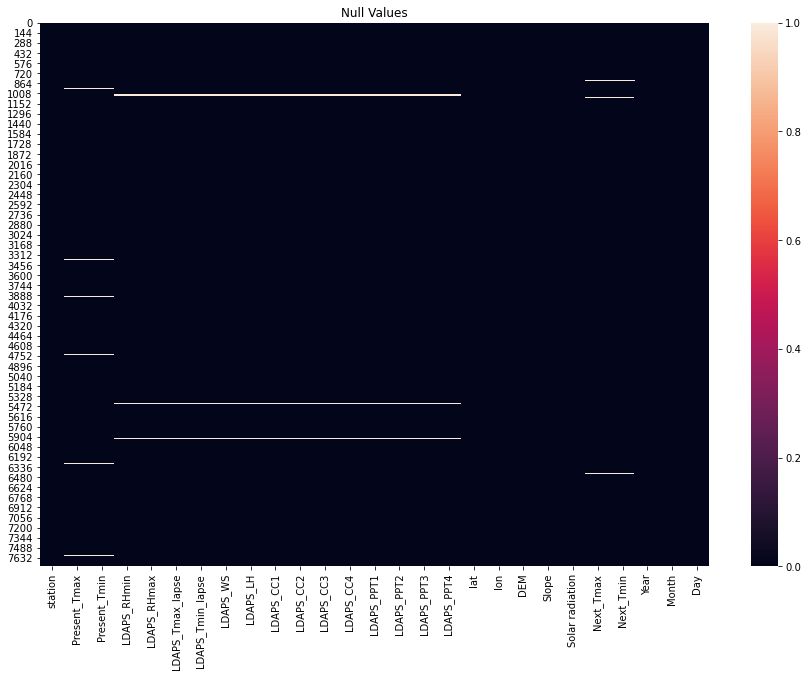

In [20]:
#Visualizeing null values
plt.figure(figsize=[15,10])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

# Imputaion method to replace nan values:

In [21]:
#Checking for skewness
df.skew()

station             0.000182
Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
LDAPS_WS            1.571581
LDAPS_LH            0.670491
LDAPS_CC1           0.457231
LDAPS_CC2           0.470060
LDAPS_CC3           0.637630
LDAPS_CC4           0.663251
LDAPS_PPT1          5.367675
LDAPS_PPT2          5.747360
LDAPS_PPT3          6.425829
LDAPS_PPT4          6.792379
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
Year               -0.000365
Month              -0.705586
Day                 0.245283
dtype: float64

In [22]:
#Replacing nan values in columns having skewness
df["LDAPS_RHmax"] = df["LDAPS_RHmax"].fillna(df["LDAPS_RHmax"].median())
df["LDAPS_Tmin_lapse"] = df["LDAPS_Tmin_lapse"].fillna(df["LDAPS_Tmin_lapse"].median())
df["LDAPS_WS"] = df["LDAPS_WS"].fillna(df["LDAPS_WS"].median())
df["LDAPS_LH"] = df["LDAPS_LH"].fillna(df["LDAPS_LH"].median())
df["LDAPS_CC3"] = df["LDAPS_CC3"].fillna(df["LDAPS_CC3"].median())
df["LDAPS_CC4"] = df["LDAPS_CC4"].fillna(df["LDAPS_CC4"].median())
df["LDAPS_PPT1"] = df["LDAPS_PPT1"].fillna(df["LDAPS_PPT1"].median())
df["LDAPS_PPT2"] = df["LDAPS_PPT2"].fillna(df["LDAPS_PPT2"].median())
df["LDAPS_PPT3"] = df["LDAPS_PPT3"].fillna(df["LDAPS_PPT3"].median())
df["LDAPS_PPT4"] = df["LDAPS_PPT4"].fillna(df["LDAPS_PPT4"].median())

In [23]:
#Replacing nan values in columns without skewness
df["Present_Tmax"] = df["Present_Tmax"].fillna(df["Present_Tmax"].mean())
df["Present_Tmin"] = df["Present_Tmin"].fillna(df["Present_Tmin"].mean())
df["LDAPS_RHmin"] = df["LDAPS_RHmin"].fillna(df["LDAPS_RHmin"].mean())
df["LDAPS_Tmax_lapse"] = df["LDAPS_Tmax_lapse"].fillna(df["LDAPS_Tmax_lapse"].mean())
df["LDAPS_CC1"] = df["LDAPS_CC1"].fillna(df["LDAPS_CC1"].mean())
df["LDAPS_CC2"] = df["LDAPS_CC2"].fillna(df["LDAPS_CC2"].mean())
df["Next_Tmax"] = df["Next_Tmax"].fillna(df["Next_Tmax"].mean())
df["Next_Tmin"] = df["Next_Tmin"].fillna(df["Next_Tmin"].mean())

I have replaced all the nan values.



In [24]:
#Checking null values in the dataset again
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Year                0
Month               0
Day                 0
dtype: int64

If the column entries in the dataset are consecutive it will create problem while building the model so let me shuffel the data.



In [25]:
#Shuffeling the dataset
from sklearn.utils import shuffle
df = shuffle(df)
df.reset_index(inplace = True)
df

index  station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1954      5.0          30.1          21.9    54.285007    90.588264   
1      6062     13.0          31.9          24.2    45.639309    89.084724   
2      5951      2.0          34.5          24.1    41.338600    77.237648   
3      1338     14.0          32.9          26.2    62.344208    92.529625   
4      7568     19.0          29.5          23.4    78.759514    93.428238   
...     ...      ...           ...           ...          ...          ...   
7747   2583      9.0          26.5          19.8    58.979343    96.718201   
7748   4168     19.0          30.4          23.2    35.432404    78.266464   
7749   5232      8.0          31.4          27.4    75.323120    94.231354   
7750   6606      7.0          28.4          23.3    76.651810    94.042336   
7751   5694     20.0          34.2          25.6    53.449619    93.230438   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            29.772181         22.646971   7.670586  113.450889   0.152851   
1            25.985482         21.450309   8.442268   59.106315   0.831813   
2            33.896300         25.944384   6.013648   75.473770   0.000187   
3            30.561752         24.965483   4.716954   60.020884   0.787387   
4            28.554404         23.945344  12.118957   59.607732   0.728781   
...                ...               ...        ...         ...        ...   
7747         26.157356         18.657554   6.847233  102.937855   0.180297   
7748         32.419773         23.226285   6.257639   50.391064   0.040464   
7749         28.369199         25.209626   8.193055   33.055877   0.780074   
7750         28.672399         25.405528   6.131891   91.916778   0.416712   
7751         33.223601         26.169819   6.878940   91.097484   0.088172   

      LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0      0.257388   0.344073   0.227940    0.000000    0.000000    0.000000   
1      0.673382   0.369488   0.128405    0.843071    0.003330    0.000000   
2      0.009628   0.071210   0.050553    0.000000    0.000000    0.000000   
3      0.844352   0.675192   0.109826    6.186932    1.906663    0.429576   
4      0.598705   0.778602   0.099338    7.286318    0.000000    0.939312   
...         ...        ...        ...         ...         ...         ...   
7747   0.095605   0.005081   0.052009    0.000000    0.000000    0.000000   
7748   0.120363   0.000054   0.000000    0.000000    0.000000    0.000000   
7749   0.839348   0.739060   0.542378    0.132758    6.938690    0.343949   
7750   0.515092   0.536722   0.506112    0.000000    0.000000    0.000000   
7751   0.158086   0.080196   0.000733    0.000000    0.007069    0.000000   

      LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  \
0            0.0  37.5507  127.135   35.0380  0.5055      5701.980957   
1            0.0  37.5776  127.083   59.8324  2.6865      4591.726563   
2            0.0  37.6046  127.032   44.7624  0.5141      4767.529785   
3            0.0  37.4967  126.927   30.9680  0.6180      4750.348633   
4            0.0  37.5776  126.938   75.0924  1.7678      4762.060059   
...          ...      ...      ...       ...     ...              ...   
7747         0.0  37.4967  126.826   50.9312  0.4125      5170.145020   
7748         0.0  37.5776  126.938   75.0924  1.7678      5161.941406   
7749         0.0  37.4697  126.910   52.5180  1.5629      5567.564453   
7750         0.0  37.5776  126.838   12.3700  0.0985      5692.382324   
7751         0.0  37.6181  127.004  146.5540  4.7296      5213.896973   

      Next_Tmax  Next_Tmin  Year  Month  Day  
0          29.8       23.1  2014      7   16  
1          27.7       19.9  2016      8   25  
2          34.4       23.7  2016      8   21  
3          29.0       22.2  2013      8   22  
4          27.7       22.5  2017      8   23  
...         ...        ...   ...    ...  ...  
7

In [26]:
#lets drop the index column
df.drop(columns = 'index', inplace = True)

In [27]:
df.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      5.0          30.1          21.9    54.285007    90.588264   
1     13.0          31.9          24.2    45.639309    89.084724   
2      2.0          34.5          24.1    41.338600    77.237648   
3     14.0          32.9          26.2    62.344208    92.529625   
4     19.0          29.5          23.4    78.759514    93.428238   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         29.772181         22.646971   7.670586  113.450889   0.152851   
1         25.985482         21.450309   8.442268   59.106315   0.831813   
2         33.896300         25.944384   6.013648   75.473770   0.000187   
3         30.561752         24.965483   4.716954   60.020884   0.787387   
4         28.554404         23.945344  12.118957   59.607732   0.728781   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.257388   0.344073   0.227940    0.000000    0.000000    0.000000   
1   0.673382   0.369488   0.128405    0.843071    0.003330    0.000000   
2   0.009628   0.071210   0.050553    0.000000    0.000000    0.000000   
3   0.844352   0.675192   0.109826    6.186932    1.906663    0.429576   
4   0.598705   0.778602   0.099338    7.286318    0.000000    0.939312   

   LDAPS_PPT4      lat      lon      DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.5507  127.135  35.0380  0.5055      5701.980957       29.8   
1         0.0  37.5776  127.083  59.8324  2.6865      4591.726563       27.7   
2         0.0  37.6046  127.032  44.7624  0.5141      4767.529785       34.4   
3         0.0  37.4967  126.927  30.9680  0.6180      4750.348633       29.0   
4         0.0  37.5776  126.938  75.0924  1.7678      4762.060059       27.7   

   Next_Tmin  Year  Month  Day  
0       23.1  2014      7   16  
1       19.9  2016      8   25  
2       23.7  2016      8   21  
3       22.2  2013      8   22  
4       22.5  2017      8   23

In [28]:
#Checking for empty observations
df.loc[df['Next_Tmax'] == " "]

Empty DataFrame
Columns: [station, Present_Tmax, Present_Tmin, LDAPS_RHmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, lat, lon, DEM, Slope, Solar radiation, Next_Tmax, Next_Tmin, Year, Month, Day]
Index: []

There is no empty observation in Next_Tmax column.

In [29]:
#Checking for empty observations
df.loc[df['Next_Tmin'] == " "]

Empty DataFrame
Columns: [station, Present_Tmax, Present_Tmin, LDAPS_RHmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, lat, lon, DEM, Slope, Solar radiation, Next_Tmax, Next_Tmin, Year, Month, Day]
Index: []

There is no empty observation in Next_Tmax column.

In [30]:
#Checking description of data set
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7752.000000   7752.000000   7752.000000  7752.000000  7752.000000   
mean     12.997033     29.768211     23.225059    56.759372    88.388529   
std       7.213007      2.956557      2.403036    14.596973     7.158471   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    46.046162    84.316923   
50%      13.000000     29.900000     23.400000    55.313244    89.793480   
75%      19.000000     32.000000     24.900000    67.038254    93.704500   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7752.000000       7752.000000  7752.000000  7752.000000   
mean          29.613447         23.514984     7.092549    62.450457   
std            2.932898          2.334099     2.173913    33.571540   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.693091         22.114651     5.686487    37.532764   
50%           29.662273         23.760199     6.547470    56.865482   
75%           31.683819         25.134000     8.007471    83.904586   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1    LDAPS_CC2    LDAPS_CC3    LDAPS_CC4   LDAPS_PPT1  \
count  7752.000000  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.368774     0.356080     0.317864     0.298499     0.586267   
std       0.261185     0.256810     0.249208     0.253211     1.937198   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.148321     0.142328     0.103100     0.082741     0.000000   
50%       0.320110     0.315667     0.262555     0.227664     0.000000   
75%       0.571696     0.554963     0.494007     0.497230     0.049122   
max       0.967277     0.968353     0.983789     0.974710    23.701544   

        LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat          lon  \
count  7752.000000  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.480310     0.275508     0.266801    37.544722   126.991397   
std       1.754900     1.156495     1.200654     0.050352     0.079435   
min       0.000000     0.000000     0.000000    37.456200   126.826000   
25%       0.000000     0.000000     0.000000    37.510200   126.937000   
50%       0.000000     0.000000     0.000000    37.550700   126.995000   
75%       0.016748     0.007231     0.000000    37.577600   127.042000   
max      21.621661    15.841235    16.655469    37.645000   127.135000   

               DEM        Slope  Solar radiation    Next_Tmax    Next_Tmin  \
count  7752.000000  7752.000000      7752.000000  7752.000000  7752.000000   
mean     61.867972     1.257048      5341.502803    30.274887    22.932220   
std      54.279780     1.370444       429.158867     3.122557     2.483276   
min      12.370000     0.098475      4329.520508    17.400000    11.300000   
25%      28.700000     0.271300      4999.018555    28.200000    21.400000   
50%      45.716000     0.618000      5436.345215    30.500000    23.100000   
75%      59.832400     1.767800      5728.316406    32.600000    24.600000   
max     212.335000     5.178230      5992.895996    38.900000    29.800000   

              Year        Month          Day  
count  7752.000000  7752.000000  7752.000000  
mean   2015.000516     7.080882    16.374742  
std       1.414487     2.238124     8.243617  
min    2013.000000     1.000000     7.000000  
25%    2014.000000     7.000000     8.000000  
50%    2015.000000     7.000000    16.000000  
75%    2016.000000     8.000000    24.000000  
max    2017.000000    12.000000    31.000000

Above is the statistics about the dataset.The mean and the 2nd quantile values are almost same so there is no extreme outliers in the dataset.

# Visualization:

# Univariate Analysis:

In [31]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

[]


There is no categorical column in the dataset.

In [32]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Year', 'Month', 'Day']


Above all are numerical columns so let me replace the nan values with median if there is skewness and mean if there is no skewness.

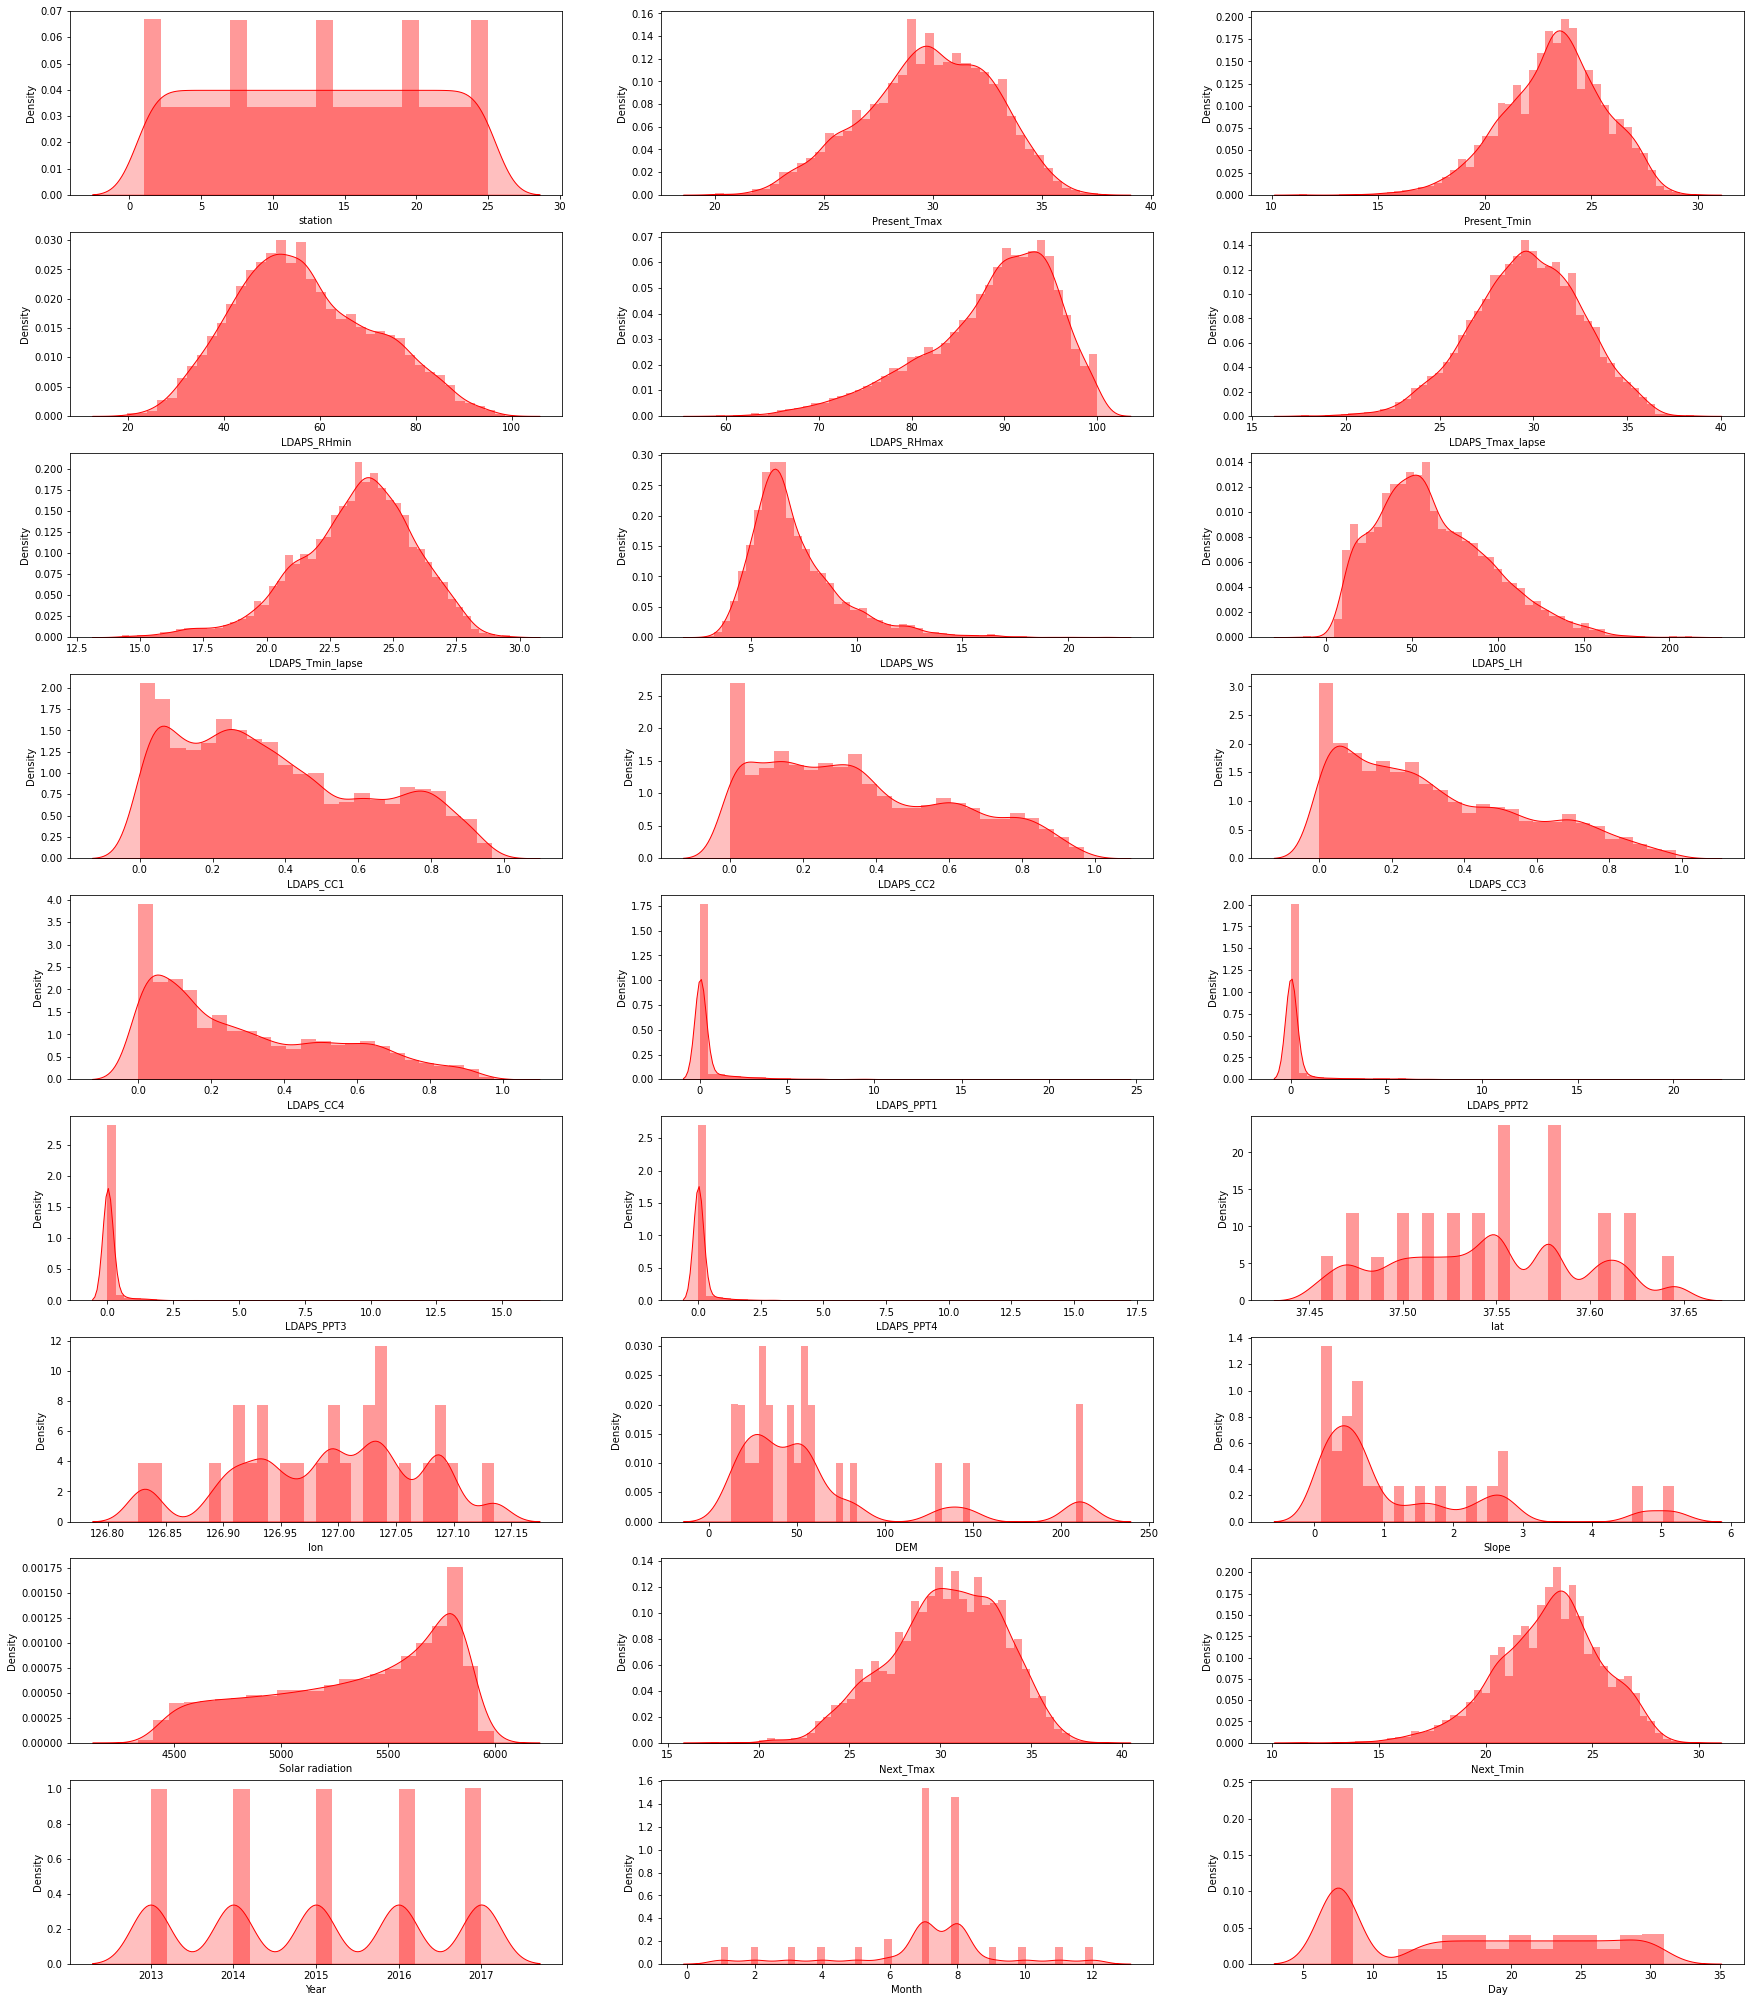

In [33]:
#Distribution plot for all numerical columns
plt.figure(figsize=(30,40), facecolor='white')
plotnumber = 1

for column in df[numerical_columns]:
    if plotnumber<=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(df[column],color='r',kde_kws={"shade": True},hist=True)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

Above are the dist plots all the columns, I can observe there is skewness in most of the columns i have remove that.

# Bivariate Analysis:

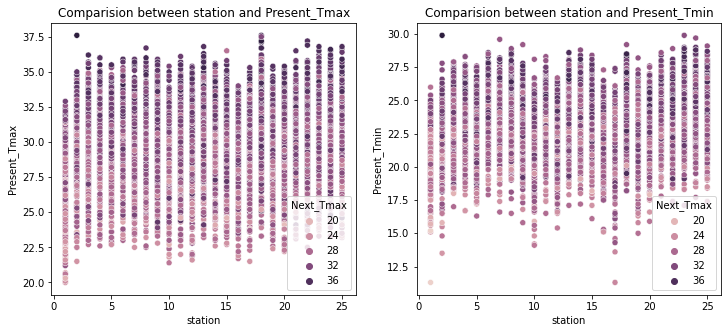

In [34]:
#Comparision between features using scatter plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between station and Present_Tmax')
sns.scatterplot(df['station'],df['Present_Tmax'],hue=df['Next_Tmax']);
plt.subplot(1, 2, 2)
plt.title('Comparision between station and Present_Tmin')
sns.scatterplot(df['station'],df['Present_Tmin'],hue=df['Next_Tmax']);
plt.show()


.In the above plot i can see that as the Present_Tmax is increasing the Next_Tmax is also increasing irrespective of station.

.And also in 2nd plot as Present_Tmin is increasing then Next_Tmax is also increasing.

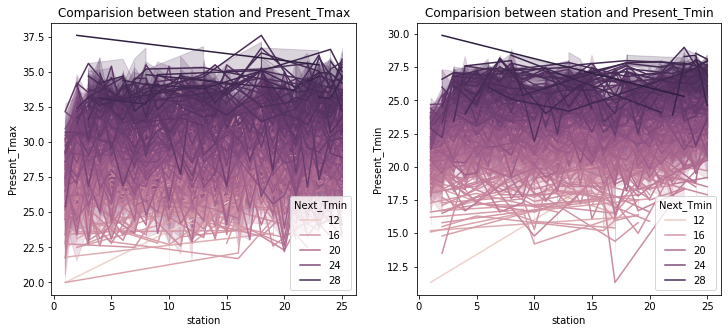

In [35]:
#Comparision between features using line plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between station and Present_Tmax')
sns.lineplot(df['station'],df['Present_Tmax'],hue=df['Next_Tmin']);
plt.subplot(1, 2, 2)
plt.title('Comparision between station and Present_Tmin')
sns.lineplot(df['station'],df['Present_Tmin'],hue=df['Next_Tmin']);
plt.show()

The graph is almost irregular but I can observe dark purple color in the range of 30 to 35 in Present_Tmax and Present_Tmin which means Next_Tmin is more here in all the stations.

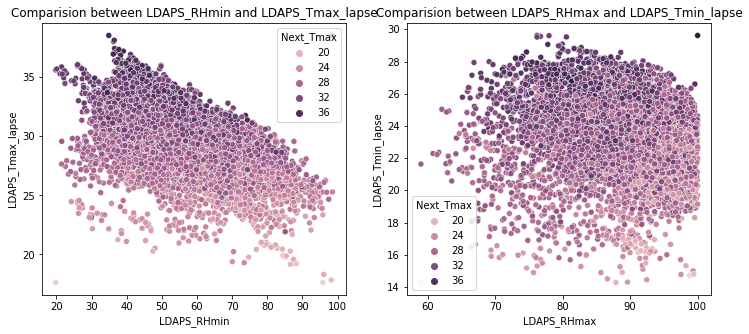

In [36]:
#Comparision between features using scatter plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between LDAPS_RHmin and LDAPS_Tmax_lapse')
sns.scatterplot(df['LDAPS_RHmin'],df['LDAPS_Tmax_lapse'],hue=df['Next_Tmax']);
plt.subplot(1, 2, 2)
plt.title('Comparision between LDAPS_RHmax and LDAPS_Tmin_lapse')
sns.scatterplot(df['LDAPS_RHmax'],df['LDAPS_Tmin_lapse'],hue=df['Next_Tmax']);
plt.show()

In first plot i can observe a linear decrese in lapse with RHmin and also Next_Tmax is also decresing with the curve.

In second plot no proper pattern is observed.


In [37]:
#Comparision between features using line plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between LDAPS_RHmin and LDAPS_Tmax_lapse')
sns.lineplot(df['LDAPS_RHmin'],df['LDAPS_Tmax_lapse'],hue=df['Next_Tmin']);
plt.subplot(1, 2, 2)
plt.title('Comparision between LDAPS_RHmax and LDAPS_Tmin_lapse')
sns.lineplot(df['LDAPS_RHmax'],df['LDAPS_Tmin_lapse'],hue=df['Next_Tmin']);
plt.show()

In both the graphs there are some outliers.

The color is getting dark as lapse and RHmax is incresing in 2nd graph.

In first graph it is showing linear decreseing curve.

In [38]:
#Comparision between features using scatter plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between LDAPS_WS and LDAPS_CC1')
sns.scatterplot(df['LDAPS_WS'],df['LDAPS_CC1'],hue=df['Next_Tmax']);
plt.subplot(1, 2, 2)
plt.title('Comparision between LDAPS_LH and LDAPS_CC2')
sns.scatterplot(df['LDAPS_LH'],df['LDAPS_CC2'],hue=df['Next_Tmax']);
plt.show()

In this perticular plot most of the points are lying between 5-10 LDAPS_WS and in LDAPS_LH 0-150.

But no proper pattern is observed.


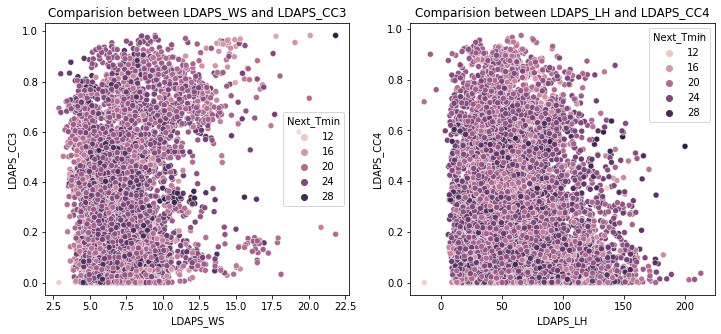

In [39]:
#Comparision between features using scatter plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between LDAPS_WS and LDAPS_CC3')
sns.scatterplot(df['LDAPS_WS'],df['LDAPS_CC3'],hue=df['Next_Tmin']);
plt.subplot(1, 2, 2)
plt.title('Comparision between LDAPS_LH and LDAPS_CC4')
sns.scatterplot(df['LDAPS_LH'],df['LDAPS_CC4'],hue=df['Next_Tmin']);
plt.show()

In this perticular plot most of the points are lying between 5-10 LDAPS_WS and in LDAPS_LH 0-150.

But no proper pattern is observed.

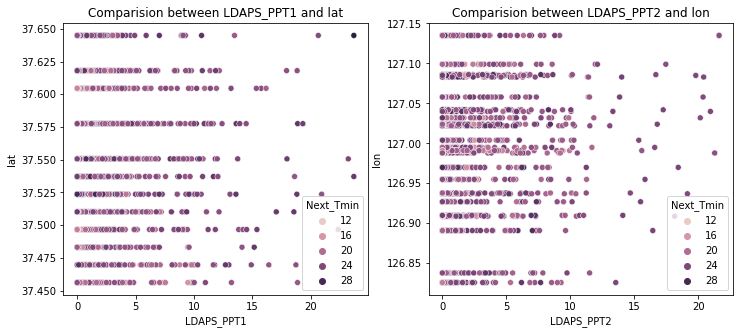

In [40]:
#Comparision between features using scatter plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between LDAPS_PPT1 and lat')
sns.scatterplot(df['LDAPS_PPT1'],df['lat'],hue=df['Next_Tmin']);
plt.subplot(1, 2, 2)
plt.title('Comparision between LDAPS_PPT2 and lon')
sns.scatterplot(df['LDAPS_PPT2'],df['lon'],hue=df['Next_Tmin']);
plt.show()

In this graph also i can not observe any patterens.

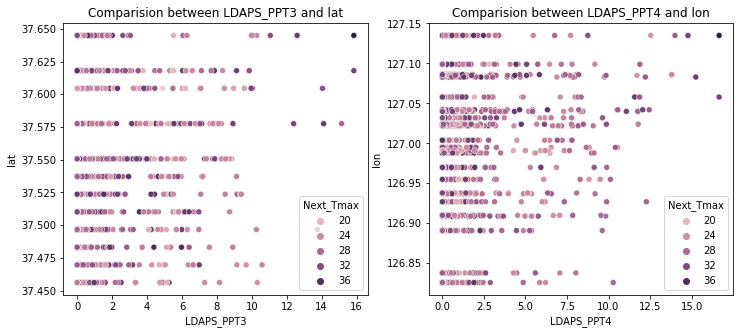

In [41]:
#Comparision between features using scatter plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between LDAPS_PPT3 and lat')
sns.scatterplot(df['LDAPS_PPT3'],df['lat'],hue=df['Next_Tmax']);
plt.subplot(1, 2, 2)
plt.title('Comparision between LDAPS_PPT4 and lon')
sns.scatterplot(df['LDAPS_PPT4'],df['lon'],hue=df['Next_Tmax']);
plt.show()

I can say that lat and lon are just geometrical features they do not have any proper relationship with our features.

In [42]:
#Comparision between features using scatter plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between DEM and Slope')
sns.scatterplot(df['DEM'],df['Slope'],hue=df['Next_Tmax']);
plt.subplot(1, 2, 2)
plt.title('Comparision between Solar radiation and Slope')
sns.scatterplot(df['Solar radiation'],df['Slope'],hue=df['Next_Tmax']);
plt.show()

In first plot there is no patteren at all.

In 2nd plot I can notice that there is no solar radiation in between the slope 3 to 4.5.

In [43]:
#Comparision between features using scatter plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between Day and Year')
sns.scatterplot(df['Day'],df['Year'],hue=df['Next_Tmin']);
plt.subplot(1, 2, 2)
plt.title('Comparision between Month and Year')
sns.scatterplot(df['Month'],df['Year'],hue=df['Next_Tmin']);
plt.show()

In first graph i can notice that 6 to 13 day there is no temperature noted.

In second graph it looks setteled.

In [45]:
#Comparision between features using scatter plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between Day and Year')
sns.scatterplot(df['Day'],df['Year'],hue=df['Next_Tmax']);
plt.subplot(1, 2, 2)
plt.title('Comparision between Month and Year')
sns.scatterplot(df['Month'],df['Year'],hue=df['Next_Tmax']);
plt.show()

In first graph i can notice that 6 to 13 day there is no temperature noted.

In second graph it looks setteled.

# Checking for outliers:

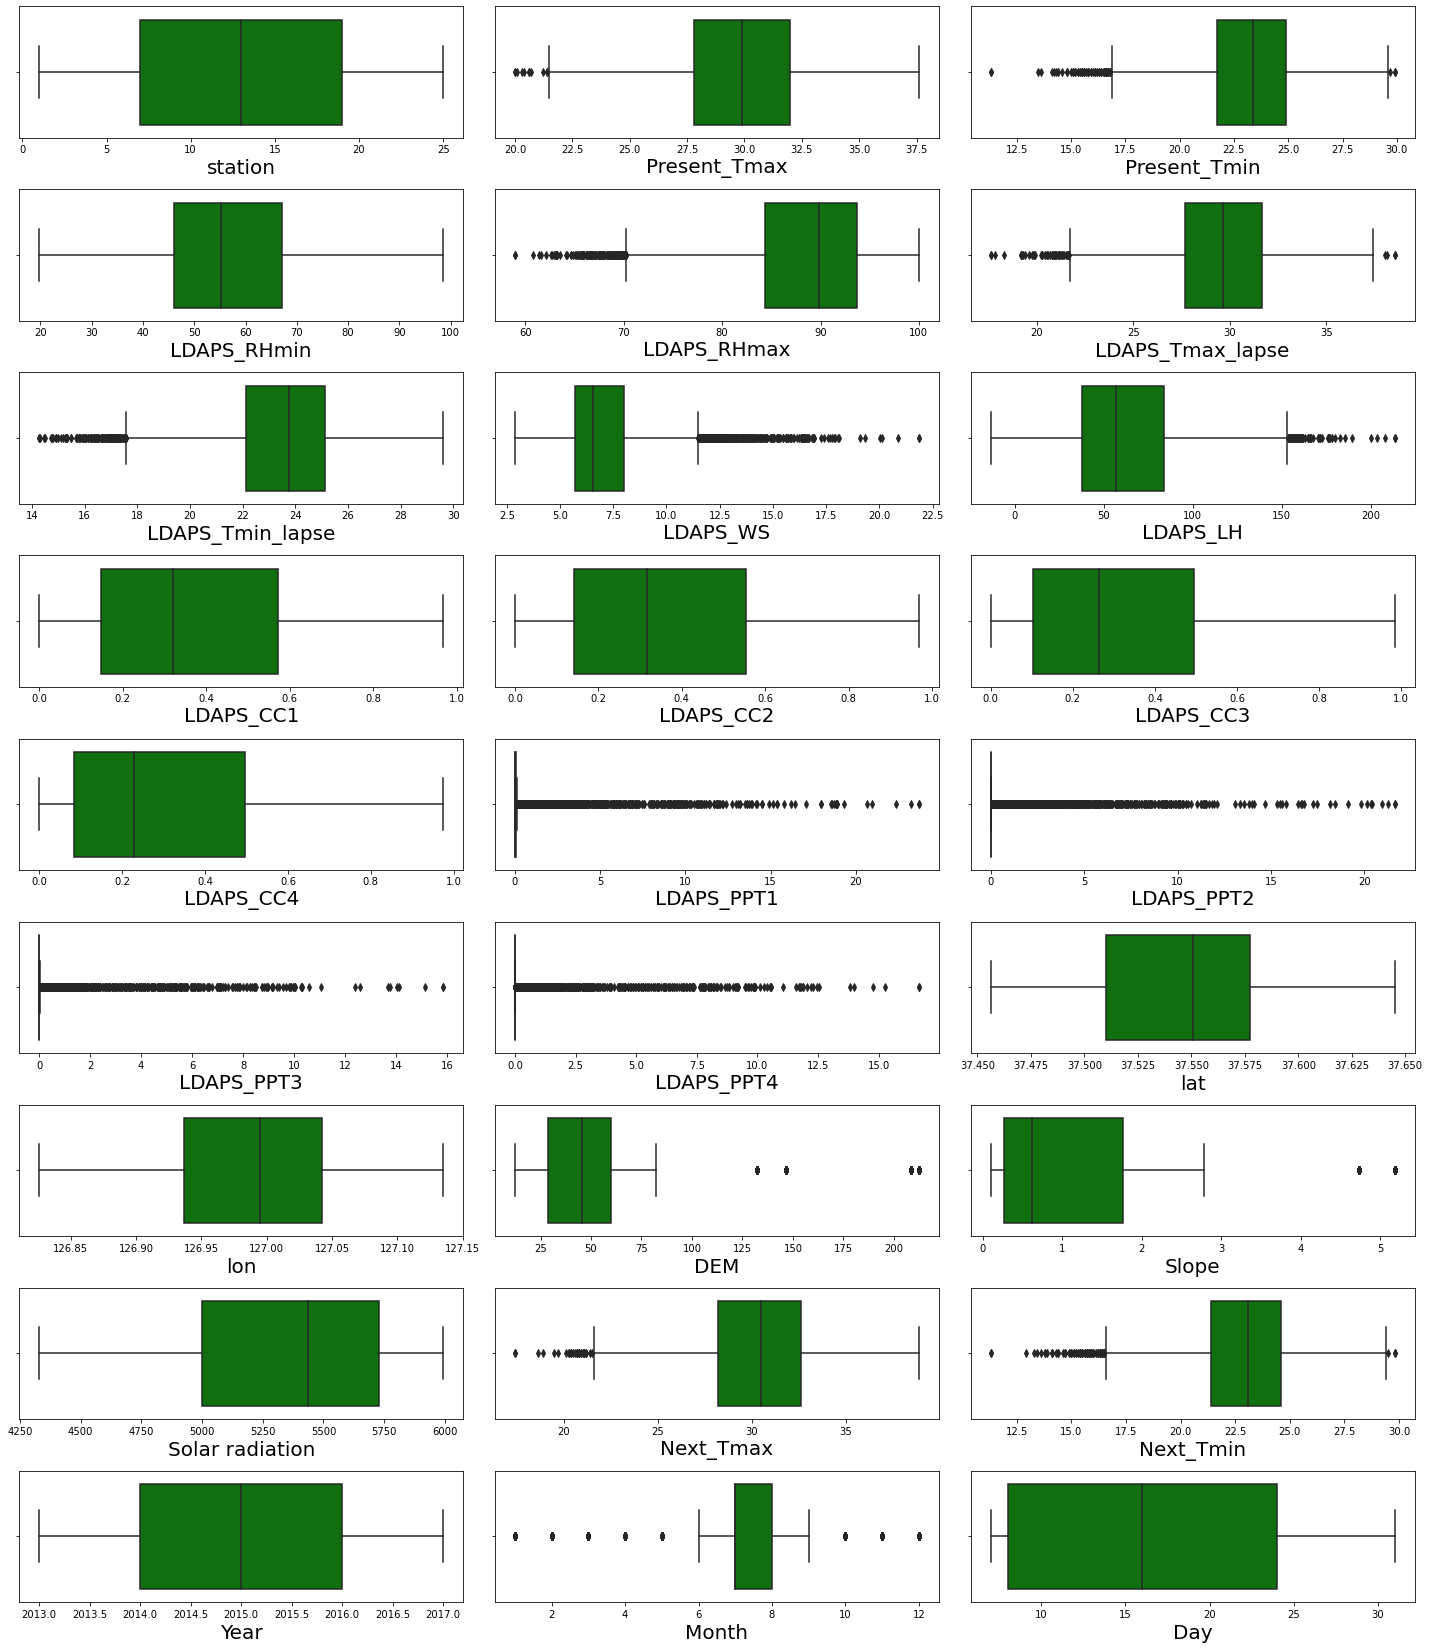

In [49]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

There are outliers in:

Present_Tmax

Present_Tmin

LDAPS_RHmax

LDAPS_Tmax_lapse

LDAPS_Tmin_lapse

LDAPS_WS

LDAPS_LH

LDAPS_PPT1

LDAPS_PPT2

LDAPS_PPT3

LDAPS_PPT4

DEM

Slope

Month

Next_Tmax

Next_Tmin

But i should not remove outliers in target column.

# Removing outliers:

# Zscore Method

In [55]:
#Features having outliers
features=df[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']]

In [56]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         5.0          30.1          21.9    54.285007    90.588264   
1        13.0          31.9          24.2    45.639309    89.084724   
2         2.0          34.5          24.1    41.338600    77.237648   
3        14.0          32.9          26.2    62.344208    92.529625   
5        10.0          24.9          19.8    31.613382    93.673698   
...       ...           ...           ...          ...          ...   
7746     17.0          27.0          22.4    49.717018    95.769882   
7747      9.0          26.5          19.8    58.979343    96.718201   
7748     19.0          30.4          23.2    35.432404    78.266464   
7750      7.0          28.4          23.3    76.651810    94.042336   
7751     20.0          34.2          25.6    53.449619    93.230438   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            29.772181         22.646971  7.670586  113.450889   0.152851   
1            25.985482         21.450309  8.442268   59.106315   0.831813   
2            33.896300         25.944384  6.013648   75.473770   0.000187   
3            30.561752         24.965483  4.716954   60.020884   0.787387   
5            26.510704         18.574755  9.630040   56.746597   0.051827   
...                ...               ...       ...         ...        ...   
7746         28.019070         22.573322  6.504984  124.258094   0.190197   
7747         26.157356         18.657554  6.847233  102.937855   0.180297   
7748         32.419773         23.226285  6.257639   50.391064   0.040464   
7750         28.672399         25.405528  6.131891   91.916778   0.416712   
7751         33.223601         26.169819  6.878940   91.097484   0.088172   

      LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0      0.257388   0.344073   0.227940    0.000000    0.000000    0.000000   
1      0.673382   0.369488   0.128405    0.843071    0.003330    0.000000   
2      0.009628   0.071210   0.050553    0.000000    0.000000    0.000000   
3      0.844352   0.675192   0.109826    6.186932    1.906663    0.429576   
5      0.198620   0.026087   0.012952    0.000000    0.000000    0.000000   
...         ...        ...        ...         ...         ...         ...   
7746   0.117744   0.024337   0.317136    0.000000    0.000000    0.000000   
7747   0.095605   0.005081   0.052009    0.000000    0.000000    0.000000   
7748   0.120363   0.000054   0.000000    0.000000    0.000000    0.000000   
7750   0.515092   0.536722   0.506112    0.000000    0.000000    0.000000   
7751   0.158086   0.080196   0.000733    0.000000    0.007069    0.000000   

      LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  \
0            0.0  37.5507  127.135   35.0380  0.5055      5701.980957   
1            0.0  37.5776  127.083   59.8324  2.6865      4591.726563   
2            0.0  37.6046  127.032   44.7624  0.5141      4767.529785   
3            0.0  37.4967  126.927   30.9680  0.6180      4750.348633   
5            0.0  37.4562  126.955  208.5070  5.1782      5887.616211   
...          ...      ...      ...       ...     ...              ...   
7746         0.0  37.6181  127.099   53.4712  0.6970      4500.299316   
7747         0.0  37.4967  126.826   50.9312  0.4125      5170.145020   
7748         0.0  37.5776  126.938   75.0924  1.7678      5161.941406   
7750         0.0  37.5776  126.838   12.3700  0.0985      5692.382324   
7751         0.0  37.6181  127.004  146.5540  4.7296      5213.896973   

      Next_Tmax  Next_Tmin  Year  Month  Day  
0          29.8       23.1  2014      7   16  
1          27.7       19.9  2016      8   25  
2          34.4       23.7  2016      8   21  
3          29.0       22.2  2013      8   22  
5          26.7       19.3  2015      1    7  
...         ...        ...   ...    ...  ...  
7746       29.4       20.6  2013      8   29  
7747       28.3       18.1  2014     10    8  
774

I have removed the skewness using zscore method.

In [57]:
#Checking shape of new dataset
df_new.shape

(6907, 27)

In my new dataset i have 6907 rows and 27 columns.

In [58]:
#Checking shape of old dataset
df.shape

(7752, 27)

In my old dataset i was having 7752 rows and 27 columns.

In [59]:
#Checking dataloss in zscore method
Dataloss = (((7752-6907)/7752)*100)
Dataloss

10.900412796697626

Using zscore i'm getting 10.90% dataloss.So let me not remove any outliers from the dataset.

# Checking the correlation using heat map:

In [60]:
cor=df.corr()

In [61]:
cor

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.112806      0.132122    -0.066731   
Present_Tmax      0.112806      1.000000      0.618760    -0.204571   
Present_Tmin      0.132122      0.618760      1.000000     0.123143   
LDAPS_RHmin      -0.066731     -0.204571      0.123143     1.000000   
LDAPS_RHmax      -0.166334     -0.300322     -0.012754     0.579032   
LDAPS_Tmax_lapse  0.069363      0.570129      0.464151    -0.564580   
LDAPS_Tmin_lapse  0.105053      0.624216      0.764227     0.089471   
LDAPS_WS          0.004353     -0.123582     -0.037708     0.294271   
LDAPS_LH         -0.133693      0.134251     -0.011276    -0.070848   
LDAPS_CC1         0.006769     -0.311805      0.084447     0.613818   
LDAPS_CC2         0.003223     -0.213791      0.090263     0.745443   
LDAPS_CC3         0.000442     -0.145577     -0.005466     0.689513   
LDAPS_CC4         0.005849     -0.142683     -0.047714     0.513878   
LDAPS_PPT1       -0.004990     -0.111129      0.109121     0.262547   
LDAPS_PPT2       -0.010555     -0.101377      0.064829     0.390824   
LDAPS_PPT3       -0.015051     -0.122044     -0.049005     0.240576   
LDAPS_PPT4       -0.013033     -0.101178     -0.065647     0.168555   
lat              -0.237438     -0.052615     -0.078475     0.087099   
lon              -0.118574      0.009020     -0.043461    -0.076237   
DEM              -0.256095     -0.187121     -0.250275     0.102115   
Slope            -0.090413     -0.105809     -0.146339     0.123744   
Solar radiation  -0.018787     -0.025439      0.053578     0.244080   
Next_Tmax         0.108289      0.610348      0.471806    -0.437898   
Next_Tmin         0.128713      0.622741      0.796670     0.095019   
Year             -0.000582      0.059665      0.036987    -0.001984   
Month            -0.000169     -0.001185     -0.003550    -0.053922   
Day              -0.000730     -0.143899     -0.108728    -0.065735   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.166334          0.069363          0.105053  0.004353   
Present_Tmax        -0.300322          0.570129          0.624216 -0.123582   
Present_Tmin        -0.012754          0.464151          0.764227 -0.037708   
LDAPS_RHmin          0.579032         -0.564580          0.089471  0.294271   
LDAPS_RHmax          1.000000         -0.373334         -0.113914  0.134786   
LDAPS_Tmax_lapse    -0.373334          1.000000          0.653985 -0.311900   
LDAPS_Tmin_lapse    -0.113914          0.653985          1.000000 -0.130245   
LDAPS_WS             0.134786         -0.311900         -0.130245  1.000000   
LDAPS_LH             0.238183          0.048004         -0.134906  0.007115   
LDAPS_CC1            0.436570         -0.438439          0.010900  0.289356   
LDAPS_CC2            0.391256         -0.523619          0.047725  0.261010   
LDAPS_CC3            0.226434         -0.541197         -0.044233  0.243402   
LDAPS_CC4            0.130008         -0.429374         -0.080587  0.221066   
LDAPS_PPT1           0.267698         -0.111016          0.037727  0.153213   
LDAPS_PPT2           0.228398         -0.242033          0.000588  0.192427   
LDAPS_PPT3           0.134087         -0.188063         -0.088791  0.162173   
LDAPS_PPT4           0.117376         -0.160235         -0.094855  0.144550   
lat                  0.195761         -0.042093         -0.096252  0.036646   
lon                  0.025662          0.090666         -0.026700 -0.059448   
DEM                  0.177134         -0.178895         -0.195445  0.190995   
Slope                0.219557         -0.162332         -0.185839  0.171577   
Solar radiation      0.148259          0.047971          0.159445  0.122966   
Next_Tmax           -0.281341          0.827189          0.588206 -0.345619   
Next_Tmin           -0.070246          0.586868          0.881059 -0.098767   
Year                -0.142223          0.015978        

Above are the correlations of all the pair of features.To get better visualization on the correlation of features,let me plot it using heat map.

In [62]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

By looking into the heat map i can say that there is multicolinearity issue.

By looking into the correlation of target column with other features i can say that Next_Tmax has good correlation compared to Next_Tmin.

Let me plot a bar graph to get better insight on targets.

# i) Prediction and model building for target Next_Tmax:

First let me consider Next_Tmax as target and build the model.

Separating features and label:

In [63]:
x = df.drop("Next_Tmax",axis=1)
y = df["Next_Tmax"]

Assigned y as target variable and x as remaining features.

# Bar plot for correlations of Next_Tmax column with other features:

In [64]:
plt.figure(figsize=(15,10))
df.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

lon and Solar radiation has very less correlation with target Next_Tmax.

# Checking skewness:

In [65]:
#Checking for skewness
x.skew()

station             0.000182
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmin          -0.404447
Year               -0.000365
Month              -0.705586
Day                 0.245283
dtype: float64

The skewed columns are:

LDAPS_RHmax

LDAPS_Tmin_lapse

LDAPS_WS

LDAPS_LH

LDAPS_CC3

LDAPS_CC4

LDAPS_PPT1

LDAPS_PPT2

LDAPS_PPT3

LDAPS_PPT4

DEM

Slope

Solar radiation

Month

# Removing skewness using yeo-johnson:

In [66]:
#list of skewed features
skew_fea=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']

Taking all the columns with skewness as a list with variable skew_fea.



In [67]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Using yeo-johnson to remove skewness.

In [68]:
#Removing skewness using yeo-johnson
x[skew_fea] = scaler.fit_transform(x[skew_fea].values)

Using yeo-johnson i have removed the skewness.

In [69]:
#Checking skewness after removing skewness
x[skew_fea].skew()

LDAPS_RHmax        -0.116482
LDAPS_Tmin_lapse   -0.018120
LDAPS_WS            0.002449
LDAPS_LH            0.058865
LDAPS_CC3           0.089672
LDAPS_CC4           0.129826
LDAPS_PPT1          1.463941
LDAPS_PPT2          1.646417
LDAPS_PPT3          1.824919
LDAPS_PPT4          2.059400
DEM                 0.039456
Slope               0.233968
Solar radiation    -0.176636
Month               0.043780
dtype: float64

The skewness has been reduced in all the columns.I have tried working on log, log1p, sqrt, cbrt and box-cox i found Yeo-johnson as best method in all the methods the skewness is not reducing at all.So i found Yeo-johnson as best method.

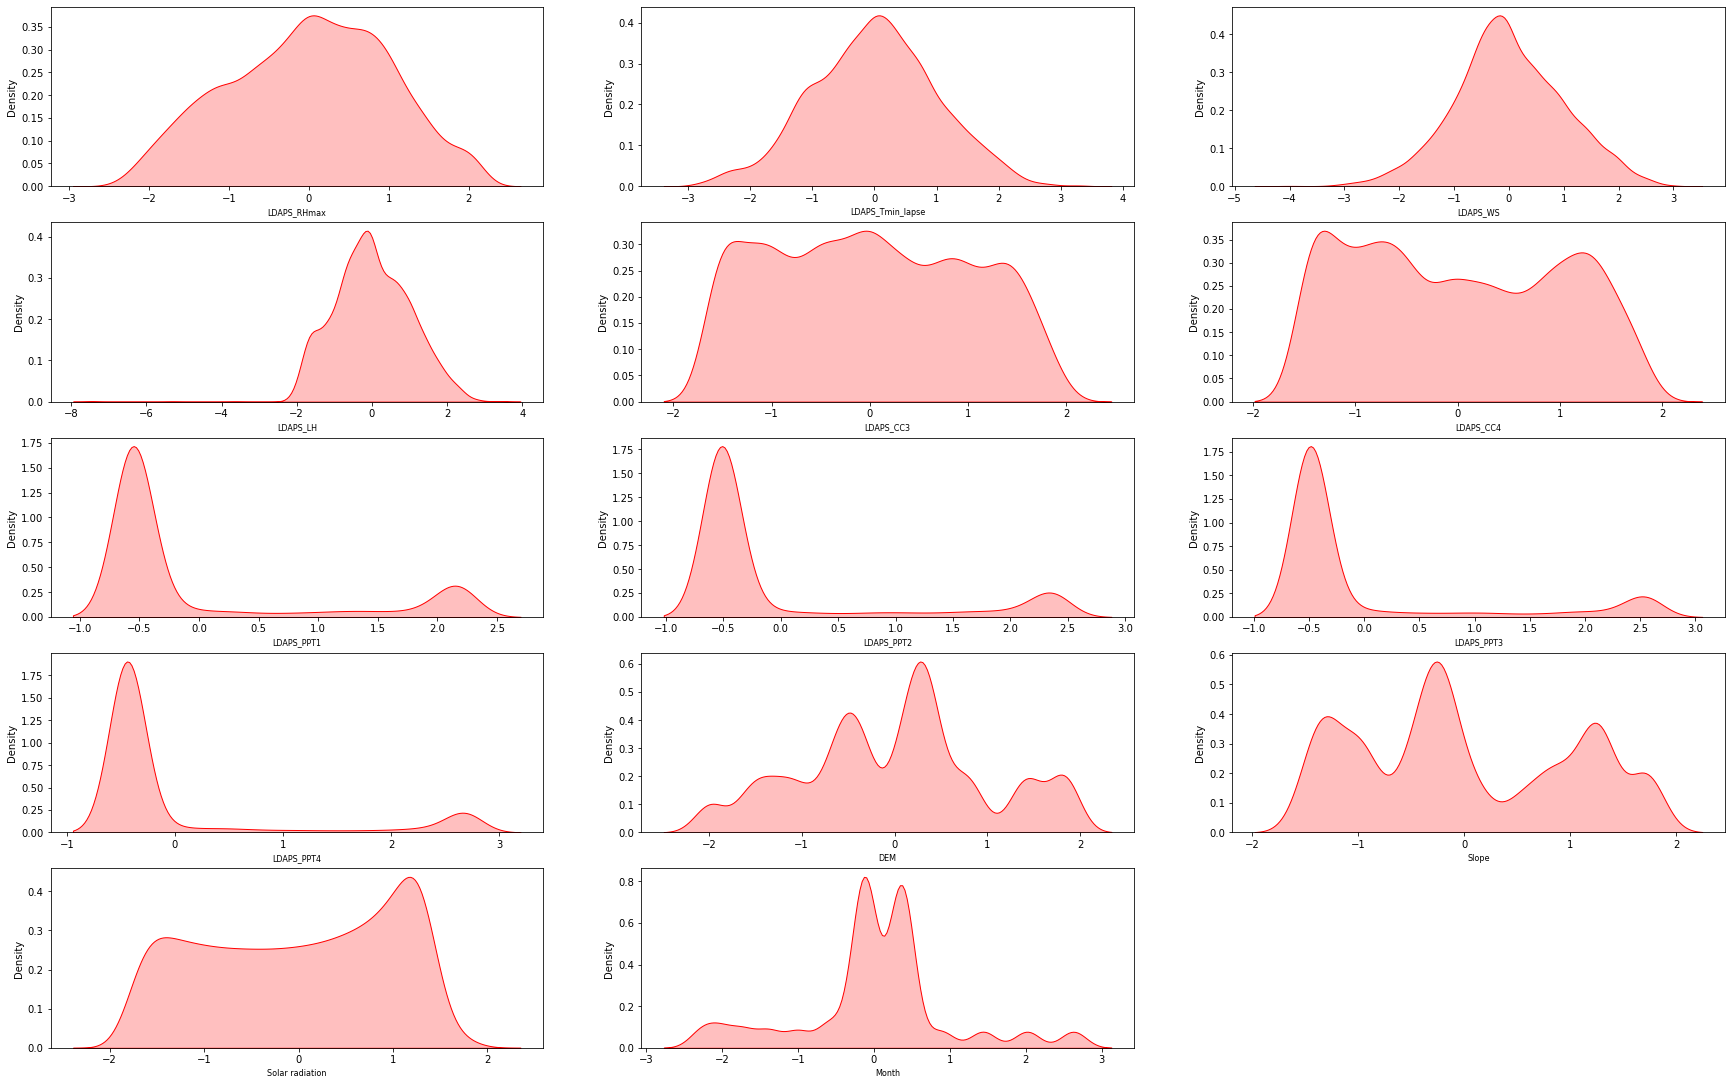

In [70]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(30,35), facecolor='white')
plotnumber = 1

for column in x[skew_fea]:
    if plotnumber<=27:
        ax = plt.subplot(9,3,plotnumber)
        sns.distplot(x[column],color='r',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=8)
    plotnumber+=1
plt.show()

Skewness has been reduced in most of the columns.

# Scaling the data using MinMax scaler:

In [71]:
#importing necessary libraries
from sklearn.preprocessing import MinMaxScaler

In [72]:
mms=MinMaxScaler()
X = pd.DataFrame(mms.fit_transform(x), columns=x.columns)

I have scaled my data using MinMax scaler since i haven't removed outliers and skewness completely from the dataset.

# Using VIF to remove multicolinearity:

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif


vif_Features          Features
0       4.535428           station
1      34.326786      Present_Tmax
2      87.573461      Present_Tmin
3      46.304936       LDAPS_RHmin
4      18.931768       LDAPS_RHmax
5      91.235501  LDAPS_Tmax_lapse
6      65.391858  LDAPS_Tmin_lapse
7      20.706292          LDAPS_WS
8      64.171809          LDAPS_LH
9      15.196003         LDAPS_CC1
10     17.615526         LDAPS_CC2
11     17.715480         LDAPS_CC3
12      9.750436         LDAPS_CC4
13      3.402685        LDAPS_PPT1
14      3.045746        LDAPS_PPT2
15      2.219612        LDAPS_PPT3
16      2.168578        LDAPS_PPT4
17      5.315337               lat
18      6.528075               lon
19     16.080959               DEM
20      9.118733             Slope
21      6.915743   Solar radiation
22    135.561527         Next_Tmin
23      3.311545              Year
24      6.480595             Month
25      2.759378               Day

In [74]:
#Droping highly VIF columns
X = X.drop(["Next_Tmin"],axis=1)

In [75]:
#Checking VIF again
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif


vif_Features          Features
0       4.534770           station
1      33.775211      Present_Tmax
2      77.650831      Present_Tmin
3      44.961529       LDAPS_RHmin
4      18.750714       LDAPS_RHmax
5      85.634324  LDAPS_Tmax_lapse
6      53.842796  LDAPS_Tmin_lapse
7      20.441734          LDAPS_WS
8      64.094992          LDAPS_LH
9      15.191476         LDAPS_CC1
10     17.566295         LDAPS_CC2
11     17.713725         LDAPS_CC3
12      9.747085         LDAPS_CC4
13      3.362391        LDAPS_PPT1
14      2.999477        LDAPS_PPT2
15      2.218487        LDAPS_PPT3
16      2.149065        LDAPS_PPT4
17      5.289129               lat
18      6.527763               lon
19     15.627247               DEM
20      9.046003             Slope
21      6.906539   Solar radiation
22      3.311293              Year
23      6.479793             Month
24      2.727148               Day

In [76]:
#Droping highly VIF columns
X = X.drop(["LDAPS_Tmax_lapse"],axis=1)

In [77]:
#Droping highly VIF columns
X = X.drop(["Present_Tmin"],axis=1)

In [78]:
#Droping highly VIF columns
X = X.drop(["LDAPS_LH"],axis=1)

In [79]:
#Droping highly VIF columns
X = X.drop(["LDAPS_RHmin"],axis=1)

In [80]:
#Droping highly VIF columns
X = X.drop(["Present_Tmax"],axis=1)

In [81]:
#Checking VIF again
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features          Features
0       4.249027           station
1      10.494177       LDAPS_RHmax
2       8.455902  LDAPS_Tmin_lapse
3      16.864878          LDAPS_WS
4      13.559921         LDAPS_CC1
5      15.963881         LDAPS_CC2
6      15.656609         LDAPS_CC3
7       9.638630         LDAPS_CC4
8       3.270818        LDAPS_PPT1
9       2.956593        LDAPS_PPT2
10      2.200590        LDAPS_PPT3
11      2.106785        LDAPS_PPT4
12      5.125603               lat
13      5.961324               lon
14     14.917218               DEM
15      8.899236             Slope
16      6.092483   Solar radiation
17      3.085602              Year
18      6.044414             Month
19      2.584583               Day

In [82]:
#Droping highly VIF columns
X = X.drop(["LDAPS_WS"],axis=1)

In [83]:
#Droping highly VIF columns
X = X.drop(["LDAPS_CC2"],axis=1)

In [84]:
#Droping highly VIF columns
X = X.drop(["DEM"],axis=1)

In [85]:
#Checking VIF again
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features          Features
0       3.680109           station
1      10.128386       LDAPS_RHmax
2       7.716922  LDAPS_Tmin_lapse
3       9.311825         LDAPS_CC1
4      12.843669         LDAPS_CC3
5       9.614301         LDAPS_CC4
6       3.068458        LDAPS_PPT1
7       2.318813        LDAPS_PPT2
8       2.199743        LDAPS_PPT3
9       2.027274        LDAPS_PPT4
10      4.878741               lat
11      5.562414               lon
12      3.429893             Slope
13      5.458326   Solar radiation
14      3.039257              Year
15      5.688665             Month
16      2.458379               Day

In [86]:
#Droping highly VIF columns
X = X.drop(["LDAPS_CC3"],axis=1)

In [87]:
#Droping highly VIF columns
X = X.drop(["LDAPS_RHmax"],axis=1)

In [88]:
#Checking VIF again
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features          Features
0       3.680020           station
1       7.637569  LDAPS_Tmin_lapse
2       7.980586         LDAPS_CC1
3       5.057435         LDAPS_CC4
4       2.931576        LDAPS_PPT1
5       2.282662        LDAPS_PPT2
6       1.967399        LDAPS_PPT3
7       2.010568        LDAPS_PPT4
8       4.437019               lat
9       5.551137               lon
10      3.129625             Slope
11      5.149675   Solar radiation
12      3.003833              Year
13      5.473596             Month
14      2.410375               Day

Now the multicolinearity issue has been solved.All the VIF values are below 10 it is acceptable.

# Finding Best Random State and Accuracy:

In [89]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [91]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.915109097325086  on Random_state  115


In [93]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

Created train test split.

# Regression Algorithms:

In [97]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor

from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

# i) RandomForestRegressor:

In [98]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.9153299025286461
mean_squared_error: 0.8112593168241632
mean_absolute_error: 0.6718091112984779
root_mean_squared_error: 0.9006993487419447


RFR is giving me 91.53% r2_score.

# ii) ExtraTreeRegressor:

In [99]:
ETR=ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred=ETR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.9212573234701988
mean_squared_error: 0.754466238663361
mean_absolute_error: 0.6437961551839761
root_mean_squared_error: 0.8686001604094723


ETR is giving me 92.12% r2_score.

# iii)DecisionTreeRegressor:

In [100]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8080866505443016
mean_squared_error: 1.8388013881942344
mean_absolute_error: 0.9627791088219009
root_mean_squared_error: 1.35602411047674


DTR is giving me 80.80% r2_score.

# iv) Gradient Boosting:

In [101]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8197990128873991
mean_squared_error: 1.7265803874321526
mean_absolute_error: 1.0238701643224175
root_mean_squared_error: 1.3139940591312247


GBR is giving me 81.97% r2_score

# v) KNN:

In [102]:
knn=KNN()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.7663267209014577
mean_squared_error: 2.2389205920742175
mean_absolute_error: 1.1299805658282478
root_mean_squared_error: 1.4963023063787002


KNN is giving me 77.63% r2_score.

# Cross validation score:

In [103]:
print(cross_val_score(RFR,X,y,cv=5).mean())

0.9085675491584938


In [104]:
print(cross_val_score(ETR,X,y,cv=5).mean())

0.9179617223848829


In [105]:
print(cross_val_score(GBR,X,y,cv=5).mean())

0.7979046766247981


In [106]:
print(cross_val_score(DTR,X,y,cv=5).mean())

0.793247797716062


In [107]:
print(cross_val_score(knn,X,y,cv=5).mean())

0.7637702309388691


Difference between the model accuracy and cross validation score are:



RFR - 0.68%

ETR - 0.88%

GBR - 2.18%

DTR - 1.58%

KNN - 1.26%

# By comparing all we get minimum difference of Random forest regressor thus we chose for Hyperparameter

# Hyper parameter tuning:


In [116]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV
parameters={"bootstrap":[True],
           "n_estimators":[10,20],   #taking parameters
           "max_depth":[5,6],
           "max_features":['auto','sqrt'],
           "criterion":['poisson','absolute_error']}
grid=GridSearchCV(estimator=RFR, param_grid=parameters,cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True],
                         'criterion': ['poisson', 'absolute_error'],
                         'max_depth': [5, 6], 'max_features': ['auto', 'sqrt'],
                         'n_estimators': [10, 20]})

In [117]:
best_parameters=grid.best_params_  #best params
print(best_parameters)

{'bootstrap': True, 'criterion': 'poisson', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 10}


In [119]:
clf=RandomForestRegressor(bootstrap=True,criterion='poisson',max_depth=6,max_features='sqrt',n_estimators=10)
clf.fit(X_train,y_train)

RandomForestRegressor(criterion='poisson', max_depth=6, max_features='sqrt',
                      n_estimators=10)

# Final Model

In [120]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
Final_mod = RandomForestRegressor()
Final_mod.fit(X_train,y_train)
pred = Final_mod.predict(X_test)
print((rf.score(X_test,y_test)*100))

91.40948379596983


# Hay!!! that's great we can see that our accuracy remains same almost 91.40 so we can say thatRandom Forest is  is best regressor

# Saving the model:

In [121]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_mod,"Next_Tmax.pkl")

['Next_Tmax.pkl']

# Predictions for Next_Tmax:

In [122]:
# Loading the saved model
model=joblib.load("Next_Tmax.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([28.935, 32.251, 26.252, ..., 26.531, 29.924, 30.126])

In [123]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

0       1       2       3       4       5       6          7     \
Predicted  28.935  32.251  26.252  33.166  25.983  32.214  29.357  32.721749   
Actual     27.700  32.000  27.800  33.000  25.700  32.500  29.100  33.600000   

             8      9       10      11      12      13      14      15    \
Predicted  31.824  29.82  26.933  33.789  28.327  32.743  33.403  30.111   
Actual     31.100  29.30  26.700  34.900  28.100  32.700  33.100  30.300   

                16     17         18      19      20      21         22    \
Predicted  34.641749  28.72  33.182749  32.535  30.013  33.016  30.252498   
Actual     35.600000  28.90  33.600000  32.200  30.000  32.500  29.900000   

             23      24      25         26         27      28         29    \
Predicted  28.741  31.215  25.257  31.532498  27.822726  32.325  32.921749   
Actual     29.100  31.800  25.200  33.900000  26.100000  32.000  33.300000   

            30      31      32         33      34      35      36      37    \
Predicted  34.33  32.023  33.371  34.761986  23.969  28.566  32.263  31.262   
Actual     36.10  31.800  34.400  34.500000  24.000  29.100  31.400  32.500   

             38         39      40      41      42      43      44      45    \
Predicted  28.172  32.196744  28.089  31.132  29.876  27.256  29.373  30.161   
Actual     28.600  31.600000  27.500  30.400  30.200  28.400  27.500  31.100   

             46    47      48         49      50      51      52      53    \
Predicted  31.886  33.3  28.444  30.119498  32.323  34.798  33.843  31.302   
Actual     31.500  33.1  28.800  28.000000  32.800  35.400  34.100  30.600   

                54      55      56      57         58      59      60    \
Predicted  24.088000  34.954  26.278  28.835  29.922498  34.227  29.676   
Actual     30.274887  34.700  26.000  29.300  30.100000  34.100  28.900   

             61    62         63      64      65      66     67      68    \
Predicted  31.225  30.4  28.309749  25.809  31.272  34.202  34.71  29.608   
Actual     32.000  31.5  28.200000  24.300  30.600  35.700  34.90  28.900   

             69      70      71      72         73         74      75    \
Predicted  32.625  23.558  29.993  23.644  32.661498  30.706749  35.278   
Actual     32.500  23.000  31.500  22.500  33.000000  30.700000  34.400   

             76     77      78      79      80         81     82         83    \
Predicted  30.965  27.55  25.249  26.055  30.674  28.536749  30.05  33.534749   
Actual     29.000  27.30  25.900  27.400  29.800  28.800000  31.30  34.400000   

             84      85      86      87     88      89    90      91    \
Predicted  34.119  28.057  30.054  32.659  25.05  31.796  29.4  31.897   
Actual     34.200  28.800  29.000  32.200  25.50  34.600  29.6  32.900   

             92     93         94      95      96      97         98    \
Predicted  31.573  30.91  27.930498  26.768  31.385  33.502  34.901749   
Actual     31.700  29.40  25.600000  25.900  31.700  34.100  34.700000   

             99      100     101     102        103     104     105     106   \
Predicted  31.596  34.681  35.287  26.169  29.249749  32.371  29.164  32.046   
Actual     30.600  34.900  37.000  26.800  29.500000  33.300  29.100  31.700   

             107     108        109     110        111        112        113   \
Predicted  28.684  28.636  28.770744  30.544  28.888498  28.890749  33.349749   
Actual     26.300  27.700  28.300000  31.300  28.100000  27.700000  34.800000   

             114     115        116     117        118     119        120   \
Predicted  26.351  29.425  32.800749  32.189  31.551749  24.431  25.900749   
Actual     26.600  28.600  31.700000  31.400  31.900000  25.200  24.500000   

             121     122        123     124     125     126        127   \
Predicted  23.667  32.376  33.841498  31.471  32.943  28.684  32.693749   
Actual     23.300  32.000  35.000000  30.800  32.500  28.000  33.000000   

             128     129        130     13

Above are the predicted values and the actual values.They are almost similar.

# ii) Prediction and model building for target Next_Tmin:

In [124]:
x_1 = df.drop("Next_Tmin",axis=1)
y_1 = df["Next_Tmin"]

Assigned y_1 as target variable and x_1 as remaining features.

# Bar plot for correlations of Next_Tmin column with other features:


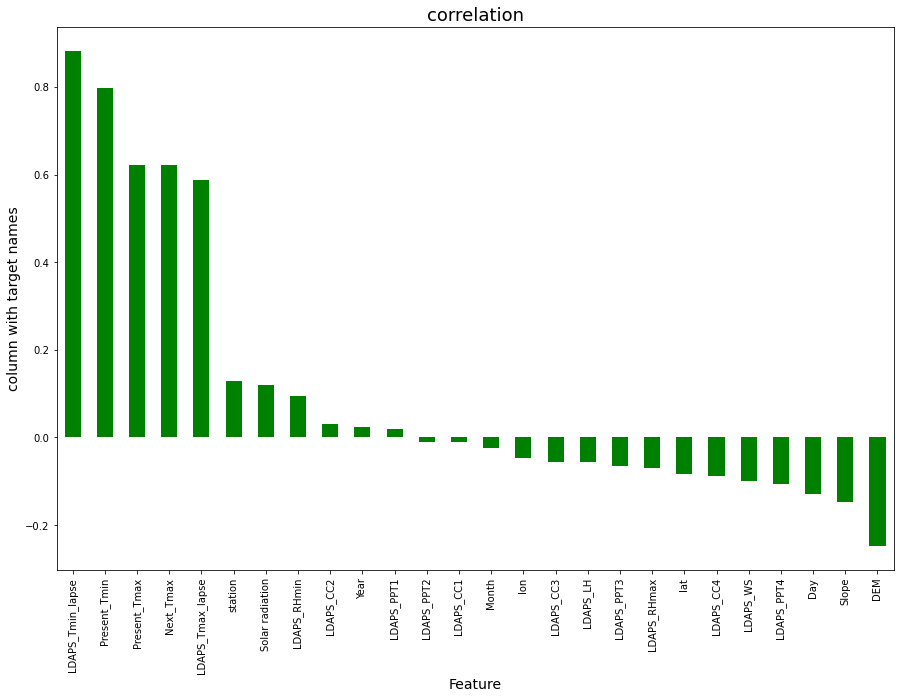

In [125]:
plt.figure(figsize=(15,10))
df.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

lon and Solar radiation has very less correlation with target Next_Tmax.

# Checking skewness:

In [126]:
#Checking for skewness
x_1.skew()

station             0.000182
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Year               -0.000365
Month              -0.705586
Day                 0.245283
dtype: float64

# Removing skewness using yeo-johnson:

In [130]:
#list of skewed features
skew_fea=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']

Taking all the columns with skewness as a list with variable skew_fea.

In [131]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Using yeo-johnson to remove skewness.

In [132]:
#Removing skewness using yeo-johnson
x_1[skew_fea] = scaler.fit_transform(x_1[skew_fea].values)

Using yeo-johnson i have removed the skewness.

In [133]:
#Checking skewness after removing skewness
x_1[skew_fea].skew()

LDAPS_RHmax        -0.116482
LDAPS_Tmin_lapse   -0.018120
LDAPS_WS            0.002449
LDAPS_LH            0.058865
LDAPS_CC3           0.089672
LDAPS_CC4           0.129826
LDAPS_PPT1          1.463941
LDAPS_PPT2          1.646417
LDAPS_PPT3          1.824919
LDAPS_PPT4          2.059400
DEM                 0.039456
Slope               0.233968
Solar radiation    -0.176636
Month               0.043780
dtype: float64

The skewness has been reduced in all the columns.

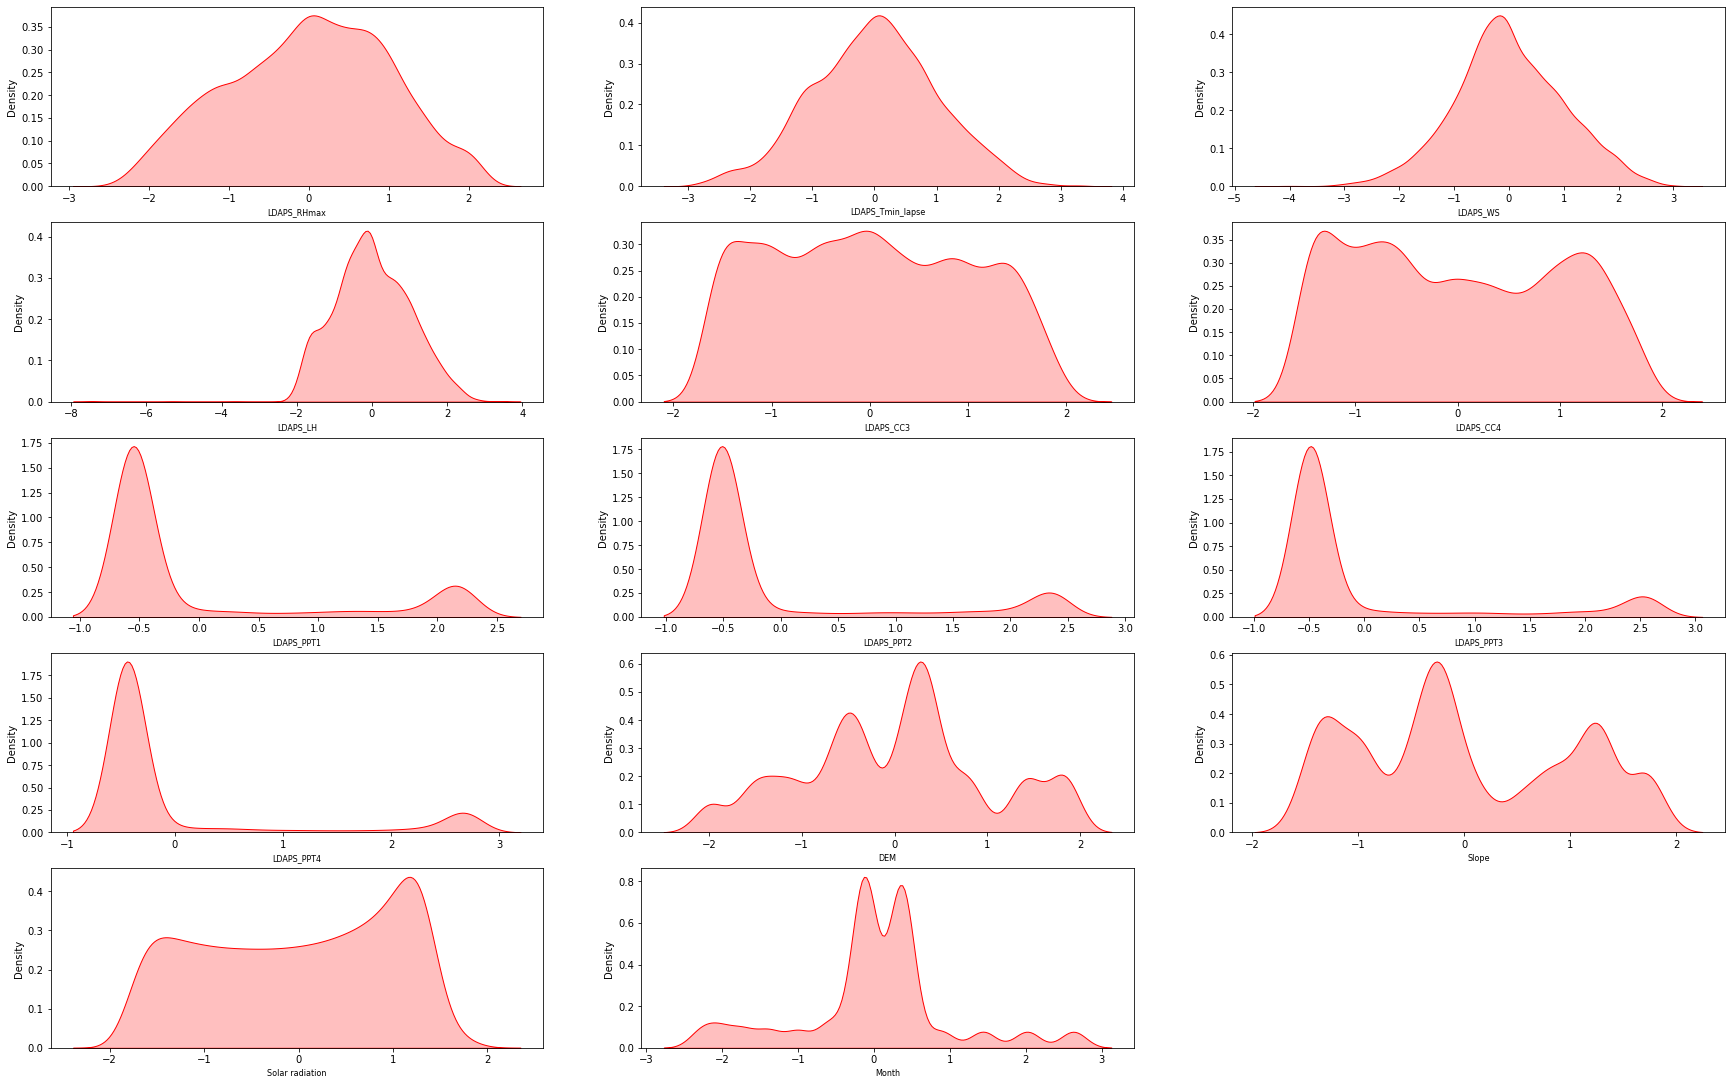

In [134]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(30,35), facecolor='white')
plotnumber = 1

for column in x_1[skew_fea]:
    if plotnumber<=27:
        ax = plt.subplot(9,3,plotnumber)
        sns.distplot(x_1[column],color='r',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=8)
    plotnumber+=1
plt.show()

Skewness has been reduced in most of the columns.

# Scaling the data using MinMax scaler:

In [135]:
#importing necessary libraries
from sklearn.preprocessing import MinMaxScaler

In [136]:
mms=MinMaxScaler()
X_1 = pd.DataFrame(mms.fit_transform(x_1), columns=x_1.columns)

I have scaled my data using MinMax scaler since i haven't removed outliers and skewness completely from the dataset.

# Using VIF to remove multicolinearity:

In [137]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

vif_Features          Features
0       4.598736           station
1      35.154944      Present_Tmax
2      78.080026      Present_Tmin
3      45.986392       LDAPS_RHmin
4      18.751391       LDAPS_RHmax
5     120.720769  LDAPS_Tmax_lapse
6      53.866132  LDAPS_Tmin_lapse
7      20.862028          LDAPS_WS
8      65.951881          LDAPS_LH
9      15.227578         LDAPS_CC1
10     17.568605         LDAPS_CC2
11     17.747595         LDAPS_CC3
12      9.912304         LDAPS_CC4
13      3.376879        LDAPS_PPT1
14      3.003110        LDAPS_PPT2
15      2.226095        LDAPS_PPT3
16      2.150201        LDAPS_PPT4
17      5.291121               lat
18      6.560031               lon
19     15.630323               DEM
20      9.046003             Slope
21      6.910077   Solar radiation
22     76.275102         Next_Tmax
23      3.328913              Year
24      6.487337             Month
25      2.736512               Day

In [138]:
#Droping highly VIF columns
X_1 = X_1.drop(["LDAPS_Tmax_lapse"],axis=1)

In [139]:
#Droping highly VIF columns
X_1 = X_1.drop(["Present_Tmin"],axis=1)

In [140]:
#Droping highly VIF columns
X_1 = X_1.drop(["LDAPS_LH"],axis=1)

In [141]:
#Droping highly VIF columns
X_1 = X_1.drop(["Next_Tmax"],axis=1)

In [142]:
#Droping highly VIF columns
X_1 = X_1.drop(["LDAPS_RHmin"],axis=1)

In [143]:
#Droping highly VIF columns
X_1 = X_1.drop(["Present_Tmax"],axis=1)

In [144]:
#Droping highly VIF columns
X_1 = X_1.drop(["LDAPS_WS"],axis=1)

In [145]:
#Droping highly VIF columns
X_1 = X_1.drop(["LDAPS_CC2"],axis=1)

In [146]:
#Droping highly VIF columns
X_1 = X_1.drop(["DEM"],axis=1)

In [147]:
#Droping highly VIF columns
X_1 = X_1.drop(["LDAPS_CC3"],axis=1)


In [148]:
#Droping highly VIF columns
X_1 = X_1.drop(["LDAPS_RHmax"],axis=1)

In [149]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

vif_Features          Features
0       3.680020           station
1       7.637569  LDAPS_Tmin_lapse
2       7.980586         LDAPS_CC1
3       5.057435         LDAPS_CC4
4       2.931576        LDAPS_PPT1
5       2.282662        LDAPS_PPT2
6       1.967399        LDAPS_PPT3
7       2.010568        LDAPS_PPT4
8       4.437019               lat
9       5.551137               lon
10      3.129625             Slope
11      5.149675   Solar radiation
12      3.003833              Year
13      5.473596             Month
14      2.410375               Day

Now the multicolinearity issue has solved.All the VIF values are below 10 it is acceptable.

# Finding Best Random State and Accuracy:

In [150]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [151]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X_1,y_1,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8984708985955341  on Random_state  198


In [152]:
X_train,X_test,y_train,y_test=train_test_split(X_1,y_1,test_size=.30,random_state=maxRS)

# Regression Algorithms:

In [154]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor

from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics


# i) RandomForestRegressor:

In [163]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8976718345121953
mean_squared_error: 0.6309796181186866
mean_absolute_error: 0.6085012390675829
root_mean_squared_error: 0.794342255025305


RFR is giving me 89.89% r2_score

# ii) Gradient Boosting:

In [156]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8794015023408699
mean_squared_error: 0.7436387981343633
mean_absolute_error: 0.6689448134109826
root_mean_squared_error: 0.8623449415021597


GBR is giving me 87.94% r2_score.

# iii)DecisionTreeRegressor:

In [157]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.7812169298596656
mean_squared_error: 1.3490680438753138
mean_absolute_error: 0.8493288476682612
root_mean_squared_error: 1.1614938845621676


DTR is giving me 78.12% r2_score.

# iv)KNN:

In [158]:
knn=KNN()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.7701686060533195
mean_squared_error: 1.4171946158992272
mean_absolute_error: 0.9112601546608341
root_mean_squared_error: 1.1904598338034036


KNN is giving me 77.83% r2_score.

# Cross validation score:

In [159]:
print(cross_val_score(RFR,X,y,cv=5).mean())

0.9079437966341501


In [160]:
print(cross_val_score(GBR,X,y,cv=5).mean())

0.797952910119105


In [161]:
print(cross_val_score(DTR,X,y,cv=5).mean())

0.7888673033279929


In [162]:
print(cross_val_score(knn,X,y,cv=5).mean())

0.7637702309388691


# By comparing all we get minimum difference of Random forest regressor thus we chose for Hyperparameter

# Hyper parameter tuning:

In [164]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV
parameters={"bootstrap":[True],
           "n_estimators":[10,20],   #taking parameters
           "max_depth":[5,6],
           "max_features":['auto','sqrt'],
           "criterion":['poisson','absolute_error']}
grid=GridSearchCV(estimator=RFR, param_grid=parameters,cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True],
                         'criterion': ['poisson', 'absolute_error'],
                         'max_depth': [5, 6], 'max_features': ['auto', 'sqrt'],
                         'n_estimators': [10, 20]})

In [165]:
best_parameters=grid.best_params_  #best params
print(best_parameters)

{'bootstrap': True, 'criterion': 'poisson', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 20}


In [166]:
clf=RandomForestRegressor(bootstrap=True,criterion='poisson',max_depth=6,max_features='sqrt',n_estimators=10)
clf.fit(X_train,y_train)

RandomForestRegressor(criterion='poisson', max_depth=6, max_features='sqrt',
                      n_estimators=10)

# Final Model

In [167]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
Final_mod = RandomForestRegressor()
Final_mod.fit(X_train,y_train)
pred = Final_mod.predict(X_test)
print((rf.score(X_test,y_test)*100))

89.9066866148834


Hay!!! that's great we can see that our accuracy remains same almost 89.90% so we can say thatRandom Forest is is best regressor

# Saving the model

In [168]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_mod,"Next_Tmin.pkl")

['Next_Tmin.pkl']

# Predictions for Next_Tmin:


In [169]:
# Loading the saved model
model_1=joblib.load("Next_Tmin.pkl")

#Prediction
prediction_1 = model_1.predict(X_test)
prediction_1

array([23.8253222, 24.395    , 22.1253222, ..., 23.6736444, 24.3283222,
       21.8063222])

In [170]:
pd.DataFrame([model_1.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

0       1          2       3       4      5       6     \
Predicted  23.825322  24.395  22.125322  21.275  23.242  25.67  25.788   
Actual     23.600000  23.800  21.700000  21.300  24.100  25.10  25.600   

             7          8       9       10      11      12      13    \
Predicted  25.826  24.405322  25.175  20.943  24.285  24.013  22.312   
Actual     26.300  23.400000  24.700  20.000  24.000  24.600  23.100   

                14      15         16      17         18      19      20    \
Predicted  21.119644  24.446  22.309322  24.946  21.036322  24.415  18.215   
Actual     21.200000  24.200  22.300000  26.300  21.100000  24.400  18.200   

             21      22      23         24      25      26      27      28    \
Predicted  22.675  23.135  20.415  21.035322  19.579  23.773  20.758  23.411   
Actual     24.600  23.800  20.400  20.400000  20.800  24.700  20.800  23.200   

            29      30      31      32      33      34      35      36    \
Predicted  24.86  23.429  18.273  24.084  23.843  22.192  23.616  25.289   
Actual     23.30  23.500  18.400  23.200  24.200  20.700  22.300  25.200   

             37      38      39      40      41      42         43      44    \
Predicted  22.723  25.163  23.614  16.224  25.157  23.108  25.137967  21.834   
Actual     22.900  25.000  23.000  16.500  27.100  21.500  23.200000  21.300   

             45      46      47      48      49         50      51      52    \
Predicted  20.526  22.713  21.485  21.193  24.124  26.702611  19.968  24.158   
Actual     20.900  23.000  21.000  23.100  23.100  25.500000  18.300  24.500   

                53      54         55      56      57         58      59    \
Predicted  23.012322  22.931  22.542322  21.831  23.414  23.309611  19.957   
Actual     22.400000  22.800  21.200000  21.900  22.400  22.500000  18.700   

                60         61      62      63         64         65      66    \
Predicted  24.963322  21.968322  23.629  23.783  25.172322  25.097644  17.746   
Actual     23.700000  23.100000  24.200  24.600  25.000000  21.500000  19.000   

             67      68      69         70      71      72      73      74    \
Predicted  22.063  25.623  24.708  21.774967  26.537  18.701  20.034  22.044   
Actual     22.500  25.500  23.100  21.300000  27.000  19.100  20.600  22.300   

             75      76      77     78      79      80      81      82    \
Predicted  22.263  23.713  24.329  24.48  23.911  24.427  23.012  24.781   
Actual     22.800  23.000  25.300  24.80  24.500  24.500  23.400  25.900   

             83     84         85         86      87      88      89    \
Predicted  17.038  26.56  24.053322  20.017322  21.259  26.099  20.942   
Actual     16.600  26.50  24.200000  20.900000  21.300  27.000  20.400   

                90      91         92     93      94      95      96    \
Predicted  23.732322  22.906  23.307322  26.31  18.566  23.707  25.156   
Actual     23.900000  23.300  22.200000  27.60  18.800  24.000  25.300   

                97      98      99         100     101     102     103   \
Predicted  25.035644  22.895  24.058  18.495322  22.253  18.884  24.246   
Actual     24.100000  23.100  24.800  19.100000  22.100  19.800  24.100   

                104     105        106    107        108     109     110   \
Predicted  24.415967  23.538  20.405644  22.18  23.716644  24.651  23.769   
Actual     24.300000  24.300  20.300000  22.00  23.000000  24.800  23.300   

             111     112     113     114     115     116     117     118   \
Predicted  22.313  25.938  22.679  21.734  25.944  24.554  20.582  26.574   
Actual     22.600  26.100  21.700  20.400  27.200  25.500  20.100  26.900   

            119     120        121     122     123    124     125     126   \
Predicted  23.92  22.145  25.909322  21.757  23.649  24.19  21.026  23.411   
Actual     22.40  23.000  26.200000  22.900  23.500  25.80  22.900  23.400   

                127        128     129     130     131     132       

Above are the predicted values and the actual values.They are almost similar.

# Done:
Thank You:) For Evaluating My Project:)